# Vedant Singh 
Task-2

In [1]:
#importing library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
from IPython.display import clear_output
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
terrorism = pd.read_csv('globalterrorismdb_0718dist.csv', encoding ='ISO-8859-1', low_memory=False)
#Read data to a dataframe


In [4]:
terrorism.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [5]:
#Collect useful columns for our analysis. We kept 20 out of 153 columns from the original data
#Rename columns in order to get better format
terrorism.rename(columns={'eventid':'Eventid', 'iyear':'Year', 'imonth':'Month', 'iday':'Day', 
                          'extended':'Extended', 'resolution':'Resolution',  'attacktype1_txt':'Attacktype', 
                          'country_txt':'Country', 'region_txt':'Region', 'provstate': 'Provstate', 
                          'city':'City', 'crit1':'Crit1', 'crit2':'Crit2', 
                          'crit3':'Crit3', 'multiple':'Multiple', 'success':'Success', 'suicide':'Suicide', 
                          'targtype1_txt':'Targtype', 'natlty1_txt':'Natlty1', 'natlty2_txt':'Natlty2', 
                          'natlty3_txt':'Natlty3', 'gname':'Gname', 'gname2':'Gname2', 'gname3':'Gname3', 
                          'guncertain1':'Guncertain1', 'guncertain2':'Guncertain2', 'guncertain3':'Guncertain3', 
                          'claimed':'Claimed', 'weaptype1_txt':'Weaptype', 'weapsubtype1_txt':'Weapsubtype', 
                          'nkill':'Nkill', 'nkillus':'Nkillus', 'nkillter':'Nkillter', 'nwound':'Nwound', 
                          'nwoundus':'Nwoundus', 'nwoundte':'Nwoundter', 'property':'Property', 
                          'propextent_txt':'Propextent', 'propvalue':'Propvalue', 'ishostkid':'Ishostkid', 
                          'nhostkid':'Nhostkid', 'nhostkidus':'Nhostkidus', 'ransom':'Ransom', 
                          'hostkidoutcome':'Hostkidoutcome', 'nreleased':'Nreleased'},inplace=True)

#Keep 20 columns
data = terrorism[['Eventid', 'Year','Country', 'Region', 'Provstate', 'City', 'Crit1', 'Crit2', 'Crit3', 
                  'Success', 'Suicide', 'Attacktype', 'Targtype', 'Natlty1','Gname', 'Guncertain1', 
                  'Claimed', 'Weaptype', 'Nkill','Nwound']]

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Eventid      181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Country      181691 non-null  object 
 3   Region       181691 non-null  object 
 4   Provstate    181270 non-null  object 
 5   City         181257 non-null  object 
 6   Crit1        181691 non-null  int64  
 7   Crit2        181691 non-null  int64  
 8   Crit3        181691 non-null  int64  
 9   Success      181691 non-null  int64  
 10  Suicide      181691 non-null  int64  
 11  Attacktype   181691 non-null  object 
 12  Targtype     181691 non-null  object 
 13  Natlty1      180132 non-null  object 
 14  Gname        181691 non-null  object 
 15  Guncertain1  181311 non-null  float64
 16  Claimed      115571 non-null  float64
 17  Weaptype     181691 non-null  object 
 18  Nkill        171378 non-

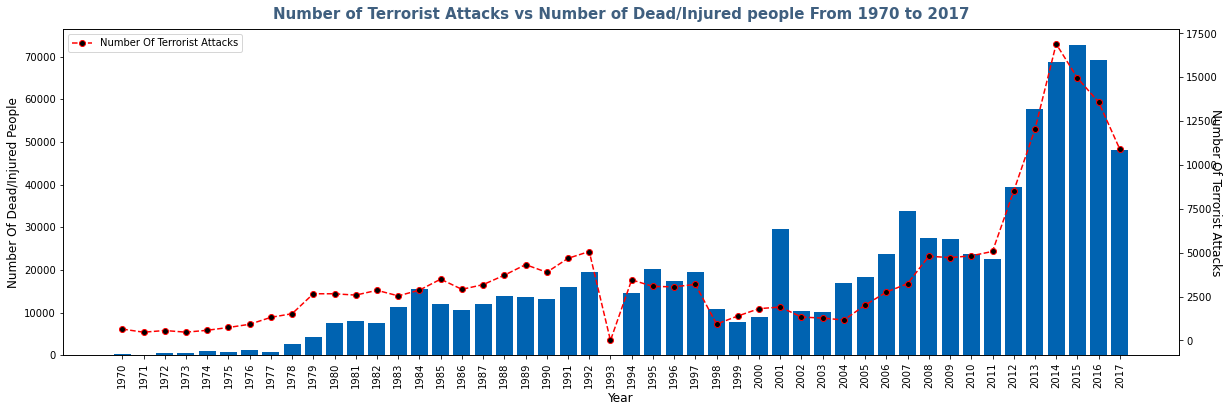

In [8]:
data['Damage']=data['Nkill']+data['Nwound']

people_damage = data[["Year","Damage"]].groupby('Year').sum()
list_year =  data["Year"].unique().tolist()

#draw bar chart
fig, ax1 = plt.subplots(figsize = (20,6))
ax1.bar(people_damage.index, [i[0] for i in people_damage.values], color= '#0063B1' )

ax1.set_xticklabels(np.arange(1970, 2018, step=1), rotation=90)
ax1.set_ylabel('Number Of Dead/Injured People', size = 12)
ax1.set_xlabel('Year', size = 12)
ax1.set_title('Number of Terrorist Attacks vs Number of Dead/Injured people From 1970 to 2017', fontsize= 15, pad= 10, weight ='bold', 
                    color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
ax2 = ax1.twinx()

#Filter & get a number of attacked in the world from 1970 to 2017 
number_attack = []
for year in list_year:
    number_attack.append(len(data[data['Year'] == year][["Year"]]))
number_attack.insert(23, 0)

#draw plot chart
ax2.set_ylabel('Number Of Terrorist Attacks', size = 12,rotation=-90)
ax2.plot(range(1970, 2018), number_attack, 'r--o', mfc='k', label='Number Of Terrorist Attacks')

plt.xticks(np.arange(1970, 2018, step=1))
plt.legend(loc='upper left')
plt.show()

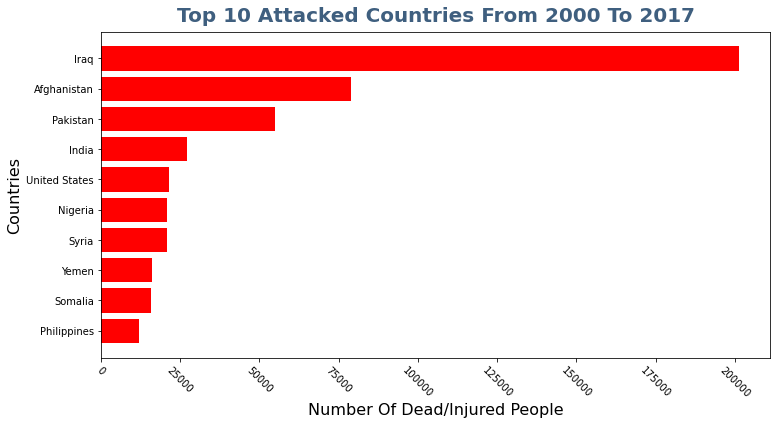

In [9]:
#Top 10 countries with the highest Number of Dead/Injured people in the world from 2000 to 2017
#Choose comlumn Country and Damage from data
country_damage = data[data['Year'] > 1999][["Country", "Damage"]].groupby('Country',as_index=False).sum()
data_paint = country_damage.sort_values(by='Damage', ascending = False).head(10)

#Paint the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(data_paint["Country"][::-1], data_paint["Damage"][::-1], color = 'red')
plt.xticks(rotation=-45)
ax.set_ylabel('Countries', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 10 Attacked Countries From 2000 To 2017", fontsize= 20, pad= 10, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.show()

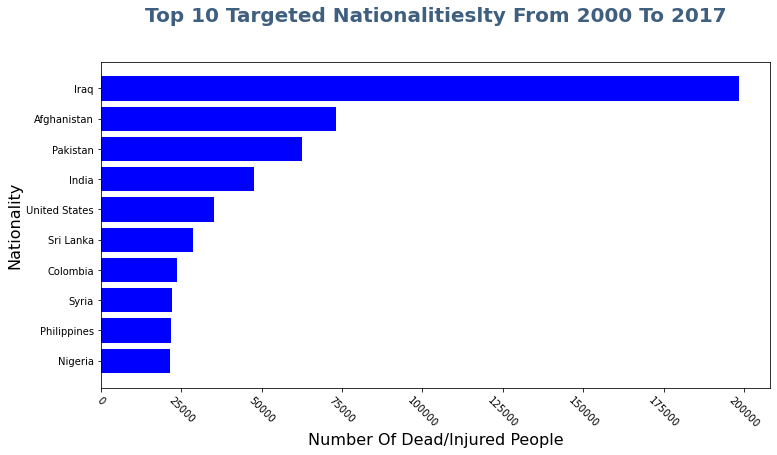

In [10]:
#Top 10 targeted nationalities with the highest number of Dead/Injured People from 2000 to 2017¶
#Choose comlumn Country and Damage from data
nalty_damage = data[["Natlty1", "Damage"]].groupby('Natlty1', as_index=False).sum()
data_paint_natlty = nalty_damage.sort_values(by='Damage', ascending = False).head(10)
fig, ax = plt.subplots(figsize=(12, 6))

#Paint bar chart
ax.barh(data_paint_natlty["Natlty1"][::-1], data_paint_natlty["Damage"][::-1], color = 'blue')
plt.xticks(rotation=-45)
ax.set_ylabel('Nationality', size=16)
ax.set_xlabel('Number Of Dead/Injured People', size=16)
plt.title("Top 10 Targeted Nationalitieslty From 2000 To 2017", fontsize= 20, pad= 40, weight ='bold', 
             color = sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])

plt.show()